<a href="https://colab.research.google.com/github/Kabeer-Scaler/Mood-Based-Song-Recommendation/blob/main/Mood_Based_Song_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mood Based Song Recommendation System
The "Mood-Based Song Recommendation System" is designed to bridge the gap between static playlist generation and high-precision personalized discovery. While traditional systems often recommend songs based solely on genre or popularity, this project implements a dual-layered intelligence framework. It first utilizes unsupervised learning (Gaussian Mixture Models) to decode the "emotional geometry" of over 114,000 tracks based on audio features like valence, energy, and danceability. This is then integrated with a personalized collaborative filtering layer (SVD) that learns individual user preferences through latent factor analysis. The final result is a context-aware hybrid engine capable of delivering music that not only matches a user's current mood but also aligns with their unique long-term listening signature.

##Loading, Inspecting, and Cleaning the Data
This initial phase involves importing the dataset and performing exploratory data analysis. The dataset consists of approximately 114,000 tracks with various audio features. During this step, we identify and remove duplicates based on track_id to ensure data integrity and convert duration_ms into a more readable time_duration_sec format.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KABEER/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.shape

(114000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [ ]:
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


In [ ]:
df.duplicated(subset=["track_id"]).sum()


24259

In [ ]:
print("Duplicate full rows:", df.duplicated().sum())
print("Duplicate track_id:", df.duplicated(subset=["track_id"]).sum())


Duplicate full rows: 0
Duplicate track_id: 24259


In [ ]:
df = (
    df.sort_values("popularity", ascending=False)
      .drop_duplicates(subset=["track_id"], keep="first")
      .reset_index(drop=True)
)


In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
1,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
2,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop
3,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton
4,68305,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,...,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latino


In [ ]:
df.shape

(89741, 21)

In [ ]:
df['time_duration_sec'] = (df['duration_ms'] / 1000).round().astype(int)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,time_duration_sec
0,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance,157
1,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop,199
2,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop,175
3,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton,163
4,68305,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,...,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latino,179


In [ ]:
df.drop('duration_ms', axis=1, inplace=True)

In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,time_duration_sec
0,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,False,0.714,0.472,2,...,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance,157
1,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,False,0.621,0.782,2,...,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop,199
2,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,True,0.561,0.965,7,...,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop,175
3,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,False,0.835,0.679,7,...,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton,163
4,68305,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,True,0.911,0.712,1,...,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latino,179


##Audio Feature Selection and Scaling
To categorize songs by "mood," we select specific numerical audio features: valence, energy, danceability, acousticness, tempo, loudness, instrumentalness, and mode. Because these features exist on different scales (e.g., tempo ranges from 0–240 while valence is 0–1), we apply StandardScaler to normalize the data, ensuring each feature contributes equally to the clustering process.

In [ ]:
# Define the list of audio features relevant for mood clustering
features = ['valence','energy','danceability',
            'acousticness','tempo','loudness','instrumentalness','mode']

In [ ]:
# Import StandardScaler to normalize data (essential for GMM/K-Means)
X=df[features]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit the scaler to the data and transform it (Standardization: Mean=0, Std=1)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()


,valence,energy,danceability,acousticness,tempo,loudness,instrumentalness,mode
0,-0.880604,-0.633108,0.859325,-0.931928,0.300912,0.215266,-0.535467,0.754945
1,0.306330,0.574981,0.332980,-0.933406,0.198380,0.565168,-0.433581,0.754945
2,-0.629522,1.288143,-0.006597,-0.959033,0.198612,0.924263,-0.535459,-1.324600
3,1.447613,0.173583,1.544140,0.752872,0.097010,0.607111,-0.535475,-1.324600
4,-0.169204,0.302186,1.974271,-0.704037,-0.997873,0.650011,-0.535398,-1.324600


In [ ]:
X_scaled_df.describe()


,valence,energy,danceability,acousticness,tempo,loudness,instrumentalness,mode
count,8.974100e+04,8.974100e+04,8.974100e+04,8.974100e+04,8.974100e+04,8.974100e+04,8.974100e+04,8.974100e+04
mean,4.680947e-16,1.520199e-17,-9.121196e-17,-1.317506e-16,-2.559002e-16,2.178952e-16,-1.646883e-17,1.520199e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.786022e+00,-2.472522e+00,-3.181647e+00,-9.703536e-01,-4.052756e+00,-7.858337e+00,-5.354810e-01,-1.324600e+00
25%,-8.387569e-01,-6.915644e-01,-6.348156e-01,-9.198096e-01,-7.568496e-01,-3.491352e-01,-5.354810e-01,-1.324600e+00
50%,-4.746742e-02,1.618921e-01,7.829709e-02,-4.146649e-01,-1.504655e-03,2.516546e-01,-5.353019e-01,7.549447e-01
75%,8.084947e-01,8.516721e-01,7.348135e-01,8.770156e-01,5.982822e-01,6.494360e-01,-2.341034e-01,7.549447e-01
max,1.999233e+00,1.424540e+00,2.393083e+00,1.973614e+00,4.028031e+00,2.495663e+00,2.552405e+00,7.549447e-01


##Unsupervised Mood Clustering with GMM
We utilize a Gaussian Mixture Model (GMM) to perform unsupervised learning.

Model Selection: We evaluate the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) across a range of clusters to find the optimal balance between complexity and accuracy.

Mood Mapping: The resulting clusters are analyzed by their mean feature values (e.g., high valence and energy for "Happy") and assigned human-readable labels such as "Sleep/Chill," "Energetic/Party," and "Sad/Calm".

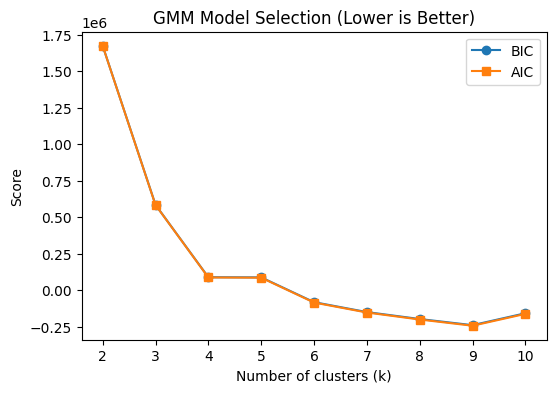

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 1. Hyperparameter Tuning for Optimal Cluster Count
bic = [] # Bayesian Information Criterion scores (penalizes model complexity more)
aic = []  # Akaike Information Criterion scores (penalizes model complexity less)
k_range = range(2, 11)

for k in k_range:
  # Initialize GMM with k components and full covariance (each cluster has its own shape)
    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full',
        random_state=42
    )
    # Fit the model to find the distribution parameters for k clusters
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

# 2. Visualize Model Selection Results (The "Elbow" Method for GMM)
plt.figure(figsize=(6,4))
plt.plot(k_range, bic, marker='o', label='BIC')
plt.plot(k_range, aic, marker='s', label='AIC')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")
plt.title("GMM Model Selection (Lower is Better)")
plt.legend()
plt.show()


In [ ]:
# Final Model Implementation
# Based on the plot above, 6 clusters were chosen as the optimal balance
gmm = GaussianMixture(
    n_components=6,
    covariance_type='full',
    random_state=42
)

# Assign each song in the dataset to its most likely mood cluster
df['cluster'] = gmm.fit_predict(X_scaled)

In [ ]:
# Cluster Profile Analysis
# View the average audio feature values for each cluster to identify their "vibe"
df.groupby('cluster')[features].mean()


,valence,energy,danceability,acousticness,tempo,loudness,instrumentalness,mode
cluster,,,,,,,,
0,0.368222,0.595891,0.512039,0.347079,121.025683,-10.872561,0.458708,1.000000
1,0.369461,0.633801,0.543312,0.283135,122.149119,-9.921182,0.463447,0.000000
2,0.062815,0.302562,0.214969,0.949415,98.778024,-32.436618,0.902980,0.434959
3,0.529094,0.682201,0.604007,0.284679,122.386681,-6.831065,0.000126,0.000000
4,0.047889,0.013703,0.108987,0.937011,63.167330,-34.430000,0.482220,0.626374
5,0.532628,0.634555,0.577645,0.351233,122.702421,-7.355157,0.000099,1.000000


In [ ]:
# Genre Distribution Analysis
# Identify the top 10 most frequent genres in each cluster to validate mood grouping
top_genres = (
    df.groupby('cluster')['track_genre']
      .value_counts()
      .groupby(level=0)
      .head(10)
)

print(top_genres)


cluster  track_genre   
0        new-age           572
         grindcore         571
         sleep             547
         classical         533
         idm               521
         study             500
         iranian           470
         black-metal       467
         detroit-techno    466
         breakbeat         455
1        study             493
         detroit-techno    471
         chicago-house     428
         idm               402
         iranian           395
         trip-hop          394
         drum-and-bass     389
         minimal-techno    382
         trance            360
         black-metal       339
2        sleep             160
         ambient            37
         classical          17
         piano              14
         world-music         7
         new-age             4
         iranian             3
         disney              2
         british             1
         german              1
3        turkish           494
         danceh

In [ ]:
# Map Numeric Clusters to Human-Readable Mood Labels
# These labels were derived from analyzing the feature means and top genres above
cluster_names = {
    0: "Sleep/Chill",
    1: "Energetic/Party/Feel-Good",
    2: "Sad/Calm",
    3: "Happy/Upbeat/Pop",
    4: "Calm/Emotional",
    5: "Study/Electronic"
}

df['cluster_name'] = df['cluster'].map(cluster_names)


In [ ]:
df.head(100)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,time_duration_sec,cluster,cluster_name
0,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,False,0.714,0.472,2,...,0.01300,0.000005,0.2660,0.238,131.121,4,dance,157,5,Study/Electronic
1,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,False,0.621,0.782,2,...,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop,199,0,Sleep/Chill
2,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,True,0.561,0.965,7,...,0.00383,0.000007,0.3710,0.304,128.040,4,pop,175,3,Happy/Upbeat/Pop
3,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,False,0.835,0.679,7,...,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton,163,3,Happy/Upbeat/Pop
4,68305,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,True,0.911,0.712,1,...,0.09010,0.000027,0.0933,0.425,92.005,4,latino,179,3,Happy/Upbeat/Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,81422,7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,87,False,0.501,0.405,1,...,0.75100,0.000000,0.1050,0.446,109.891,4,pop,182,5,Study/Electronic
96,68860,4d4ZXH4dr5bYfgErHiZCX2,Bad Bunny,Un Verano Sin Ti,Dos Mil 16,87,False,0.817,0.670,1,...,0.12300,0.000002,0.1280,0.495,130.058,3,latino,209,5,Study/Electronic
97,51402,4cacyP5c3PMlfnyjpg13xW,Yung Gravy,Betty (Get Money),Betty (Get Money),87,False,0.723,0.772,1,...,0.00524,0.000012,0.3670,0.580,102.004,4,hip-hop,146,5,Study/Electronic
98,51216,3yfqSUWxFvZELEM4PmlwIR,Eminem,The Marshall Mathers LP,The Real Slim Shady,87,True,0.949,0.661,5,...,0.03020,0.000000,0.0454,0.760,104.504,4,hip-hop,284,3,Happy/Upbeat/Pop


In [ ]:
# This serves as the 'Mood Engine' that translates user intent into data-driven clusters
mood_to_cluster = {
    "sleep": 0,
    "chill": 0,
    "energetic": 1,
    "party":1,
    "dance":1,
    "sad": 2,
    "happy": 3,
    "upbeat": 3,
    "calm": 4,
    "emotional": 4,
    "study": 5,
    "focus":5
}


In [ ]:
# top 10 genres for each cluster
top_genres_per_cluster = (
    df.groupby('cluster')['track_genre']
      .value_counts()
      .groupby(level=0)
      .head(10)
      .reset_index(name='count')
)

# convert to dictionary: {cluster: [genre1, genre2, ...]}
cluster_to_top_genres = (
    top_genres_per_cluster
    .groupby('cluster')['track_genre']
    .apply(list)
    .to_dict()
)


In [ ]:
cluster_to_top_genres

{0: ['new-age',
  'grindcore',
  'sleep',
  'classical',
  'idm',
  'study',
  'iranian',
  'black-metal',
  'detroit-techno',
  'breakbeat'],
 1: ['study',
  'detroit-techno',
  'chicago-house',
  'idm',
  'iranian',
  'trip-hop',
  'drum-and-bass',
  'minimal-techno',
  'trance',
  'black-metal'],
 2: ['sleep',
  'ambient',
  'classical',
  'piano',
  'world-music',
  'new-age',
  'iranian',
  'disney',
  'british',
  'german'],
 3: ['turkish',
  'dancehall',
  'romance',
  'malay',
  'k-pop',
  'j-dance',
  'hip-hop',
  'salsa',
  'metalcore',
  'pop-film'],
 4: ['sleep',
  'classical',
  'opera',
  'ambient',
  'new-age',
  'guitar',
  'iranian',
  'german',
  'romance',
  'world-music'],
 5: ['country',
  'honky-tonk',
  'sertanejo',
  'world-music',
  'children',
  'mandopop',
  'gospel',
  'show-tunes',
  'acoustic',
  'comedy']}

##Cold Start Recommendation Logic
To handle new users with no listening history, we implement a "Cold Start" fallback. This function filters the dataset by the user's current requested mood and recommends the most popular tracks within the top genres of that specific cluster, ensuring a high-quality initial experience.

##Interaction Synthesis and Personalization
To move beyond generic mood recommendations, we simulate a user-interaction dataset.

Synthetic Logs: 1,500 interactions are generated across 100 users, with scores ranging from -1 (skip) to 3 (listen-like).

Matrix Factorization (SVD): We use Singular Value Decomposition via the scikit-surprise library to learn latent factors from these interactions. This allows the model to predict how much a specific user will like a song they haven't heard yet.

In [ ]:
def cold_start_recommend(
    df,
    mood,
    cluster_to_top_genres,
    top_n=10,
    popularity_col="popularity"
):
    mood = mood.lower()

    if mood not in mood_to_cluster:
        raise ValueError("Mood not supported")

    target_cluster = mood_to_cluster[mood]

    # 1. Get top genres for this cluster
    top_genres = cluster_to_top_genres.get(target_cluster, [])

    # 2. Filter songs:
    #    - must be in the target cluster
    #    - must be in top genres of that cluster
    candidates = df[
        (df["cluster"] == target_cluster) &
        (df["track_genre"].isin(top_genres))
    ]

    # 3. Sort by popularity
    candidates = candidates.sort_values(
        by=popularity_col,
        ascending=False
    )

    # 4. Take top N
    recs = candidates.head(top_n)

    # 5. Fallback (if not enough songs)
    if len(recs) < top_n:
        fallback = df[df["cluster"] == target_cluster] \
            .sort_values(by=popularity_col, ascending=False)

        needed = top_n - len(recs)
        extra = fallback[~fallback.index.isin(recs.index)].head(needed)
        recs = pd.concat([recs, extra])

    return recs


In [ ]:
recs = cold_start_recommend(
    df,
    mood="party",
    cluster_to_top_genres=cluster_to_top_genres,
    top_n=10,
    popularity_col="popularity"
)

recs[['track_name', 'artists', 'track_genre', 'popularity']]



,track_name,artists,track_genre,popularity
2758,Sandstorm,Darude,trance,70
4119,Rave Harder Techno Bass,Mark Dekoda,minimal-techno,67
4510,Who Is She ?,I Monster,trip-hop,67
4008,Off The Ground,Sub Focus,drum-and-bass,67
4850,Blah Blah Blah,Armin van Buuren,trance,66
5384,Secrets,Tiësto;KSHMR;VASSY,trance,65
5415,Sandstorm,Darude,trance,65
6248,The Age Of Love - Charlotte de Witte & Enrico ...,Age Of Love;Charlotte de Witte;Enrico Sangiuliano,trance,64
6272,Xplode (ASOT 830),Avancada;Darius & Finlay,trance,64
6279,9Pm (Till I Come),ATB,trance,64


In [ ]:
import numpy as np
import pandas as pd

TOTAL_USERS = 100
INTERACTIONS_PER_USER = 15

TOTAL_INTERACTIONS = TOTAL_USERS * INTERACTIONS_PER_USER
AVG_INTERACTIONS_PER_ITEM = 10

UNIQUE_SONGS_TARGET = TOTAL_INTERACTIONS // AVG_INTERACTIONS_PER_ITEM



In [ ]:
users = pd.DataFrame({
    "user_id": range(TOTAL_USERS),
    "mood": np.random.choice(
        ["energetic" ,
    "focus" ,
    "chill" ,
    "party" ,
    "sad" ,
    "calm",
    "emotional",
    "sleep" ,
    "happy" ,
    "upbeat",
    "study",
    "dance"],
        size=TOTAL_USERS
    )
})


In [ ]:
# sample a global pool of songs
song_pool = df.sample(
    n=UNIQUE_SONGS_TARGET,
    random_state=42
).copy()

song_pool_ids = set(song_pool["track_id"])


In [ ]:
interaction_logs = []

for _, user in users.iterrows():
    user_id = user["user_id"]
    mood = user["mood"]

    # mood-based filtering from the pool
    target_cluster = mood_to_cluster[mood]

    candidates = song_pool[
        song_pool["cluster"] == target_cluster
    ]

    # fallback if cluster is small
    if len(candidates) < INTERACTIONS_PER_USER:
        candidates = song_pool

    chosen_songs = candidates.sample(
        n=INTERACTIONS_PER_USER,
        replace=False
    )

    for _, song in chosen_songs.iterrows():
        action = np.random.choice(
            ["like", "listen", "skip","listen-like"],
            p=[0.2, 0.3, 0.1, 0.4]
        )

        score = {"like": 1, "listen": 2, "skip": -1, "listen-like": 3}[action]

        interaction_logs.append({
            "user_id": user_id,
            "song_id": song["track_id"],
            "interaction": action,
            "score": score
        })


In [ ]:
interactions = pd.DataFrame(interaction_logs)


In [ ]:
interactions.head(200)

,user_id,song_id,interaction,score
0,0,5T3fDHn2b2cPFTp9nmXC0l,listen-like,3
1,0,3hnVLChkJeyvDJVozH1sv4,like,1
2,0,3WMbD1OyfKuwWDWMNbPQ4g,listen-like,3
3,0,7LMWOSOTxSMxABmkpG2YK3,listen-like,3
4,0,0orC3HuHHSA1EKCKRGYQMh,listen-like,3
...,...,...,...,...
195,13,0i02Kc3QwlaLx6bTNaxrl6,listen-like,3
196,13,03DgLHhA7HCUB8aBTNqOwX,skip,-1
197,13,5utTJECKCCDgxhvNq2JXyQ,listen,2
198,13,6BaeMmKzgm5DLR9FrwNvAo,listen,2


In [ ]:
total_interactions = len(interactions)
unique_items = interactions['song_id'].nunique()
avg_interactions = total_interactions / unique_items

print("Total interactions:", total_interactions)
print("Unique song_ids:", unique_items)
print("Average interactions per item:", avg_interactions)


Total interactions: 1500
Unique song_ids: 150
Average interactions per item: 10.0


In [ ]:
interactions.shape

(1500, 4)

##Model Optimization and Evaluation
We perform a GridSearchCV to tune the SVD hyperparameters, such as the number of latent factors and regularization strength. Through this optimization, we significantly reduced the Root Mean Squared Error (RMSE) from an initial 1.93 to a final 1.1150, representing a substantial increase in prediction accuracy.

In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds

# 1. Create the User-Item Matrix
# Rows = Users, Columns = Songs, Values = Scores
user_item_matrix = interactions.pivot(
    index='user_id',
    columns='song_id',
    values='score'
).fillna(0) # Fill unobserved interactions with 0

# Convert to a numpy array
matrix = user_item_matrix.values

# 2. Normalize the data (Mean Centering)
# This helps the SVD focus on how much a user likes a song relative to their average
user_ratings_mean = np.mean(matrix, axis=1)
matrix_demeaned = matrix - user_ratings_mean.reshape(-1, 1)

# 3. Perform Singular Value Decomposition (SVD)
# k = number of latent factors (features like 'danceability', 'vibe', etc., that the AI learns)
k = 20
U, sigma, Vt = svds(matrix_demeaned, k=k)

# Convert sigma to a diagonal matrix
sigma = np.diag(sigma)

# 4. Reconstruct the Matrix (Predicted Ratings)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

# Convert predictions back into a DataFrame
preds_df = pd.DataFrame(
    all_user_predicted_ratings,
    columns=user_item_matrix.columns,
    index=user_item_matrix.index
)

print("Prediction Matrix Shape:", preds_df.shape)

Prediction Matrix Shape: (100, 150)


In [ ]:
def recommend_songs(user_id, num_recommendations=5):
    # 1. Get and sort the user's predictions
    user_row_number = user_id
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False)

    # 2. Get the user's actual interaction history
    user_data = interactions[interactions.user_id == user_id]

    # 3. Filter out songs the user has already heard
    # We only want to recommend "New" music
    recommendations = df[~df['track_id'].isin(user_data['song_id'])]

    # 4. Merge with predictions and sort
    recommendations = recommendations.merge(
        pd.DataFrame(sorted_user_predictions).reset_index(),
        how='left',
        left_on='track_id',
        right_on='song_id'
    )

    recommendations = recommendations.rename(columns={user_id: 'predicted_score'})
    recommendations = recommendations.sort_values('predicted_score', ascending=False)

    return recommendations[['track_name', 'artists', 'track_genre', 'predicted_score']].head(num_recommendations)

# Try it out for User 5
user_5_recs = recommend_songs(user_id=5, num_recommendations=5)
print(f"Top 5 Recommendations for User 5:")
print(user_5_recs)

Top 5 Recommendations for User 5:
                        track_name                       artists  \
68921  Dawn Treader - Original Mix  Brookes Brothers;Futurebound   
84774                        Fosil                   Helzgloriam   
73206                      Lowlife                  Napalm Death   
66339                     Paradise                    Inner City   
35754                   Canon In D              Sleep Baby Sleep   

          track_genre  predicted_score  
68921   drum-and-bass         1.395754  
84774         iranian         1.356772  
73206       grindcore         0.949473  
66339  detroit-techno         0.741174  
35754           sleep         0.498171  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Split the interactions into 80% Training and 20% Testing
train_data, test_data = train_test_split(interactions, test_size=0.2, random_state=42)

# 2. Re-create the User-Item Matrix using ONLY the training data
train_user_item_matrix = train_data.pivot(
    index='user_id',
    columns='song_id',
    values='score'
).fillna(0)

matrix = train_user_item_matrix.values
user_ratings_mean = np.mean(matrix, axis=1)
matrix_demeaned = matrix - user_ratings_mean.reshape(-1, 1)

# 3. Perform SVD on the training matrix
k = 10  # Number of latent factors
U, sigma, Vt = svds(matrix_demeaned, k=k)
sigma = np.diag(sigma)

# 4. Generate Predictions
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
train_preds_df = pd.DataFrame(
    all_user_predicted_ratings,
    columns=train_user_item_matrix.columns,
    index=train_user_item_matrix.index
)

# 5. Evaluate: Compare Test Data actual scores with our Predictions
def get_predictions(row):
    user = row['user_id']
    song = row['song_id']
    # If the user or song wasn't in the training set, we skip or use a default
    if user in train_preds_df.index and song in train_preds_df.columns:
        return train_preds_df.loc[user, song]
    else:
        return 0 # Or the global average score

# Get actuals and predictions
actual_scores = test_data['score'].values
predicted_scores = test_data.apply(get_predictions, axis=1).values

# 6. Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_scores, predicted_scores))
print(f"Model RMSE: {rmse:.4f}")

Model RMSE: 1.9010


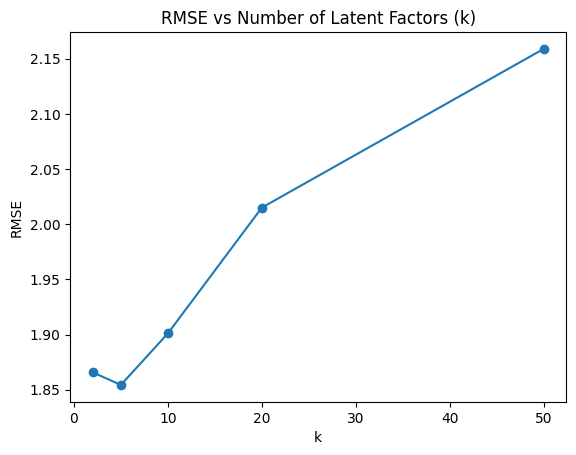

In [ ]:
import matplotlib.pyplot as plt

def evaluate_k(k_value):
    # Re-run SVD with specific k
    U, sigma, Vt = svds(matrix_demeaned, k=k_value)
    sigma_diag = np.diag(sigma)
    preds = np.dot(np.dot(U, sigma_diag), Vt) + user_ratings_mean.reshape(-1, 1)
    preds_df = pd.DataFrame(preds, columns=train_user_item_matrix.columns, index=train_user_item_matrix.index)

    # Get predictions for test set
    y_true = test_data['score'].values
    y_pred = test_data.apply(lambda x: preds_df.loc[x['user_id'], x['song_id']]
                            if (x['user_id'] in preds_df.index and x['song_id'] in preds_df.columns)
                            else train_data['score'].mean(), axis=1)
    return np.sqrt(mean_squared_error(y_true, y_pred))

k_list = [2, 5, 10, 20, 50]
errors = [evaluate_k(k) for k in k_list]

plt.plot(k_list, errors, marker='o')
plt.title("RMSE vs Number of Latent Factors (k)")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

# 1. Global Mean
global_mean = train_data['score'].mean()

# 2. User Bias (How much a user deviates from the average)
user_bias = train_data.groupby('user_id')['score'].mean() - global_mean

# 3. Item/Song Bias (How much a song deviates from the average)
song_bias = train_data.groupby('song_id')['score'].mean() - global_mean

# 4. Prepare the Residual Matrix (The "Hard" part for SVD to learn)
# We subtract the biases first, let SVD find the patterns in what's left
train_pivot = train_data.pivot(index='user_id', columns='song_id', values='score').fillna(0)
matrix = train_pivot.values

# Create a bias matrix to subtract
user_bias_vec = user_bias.reindex(train_pivot.index).fillna(0).values
song_bias_vec = song_bias.reindex(train_pivot.columns).fillna(0).values

# Subtract Mean + User Bias + Song Bias
residual_matrix = matrix - (global_mean + user_bias_vec[:, np.newaxis] + song_bias_vec[np.newaxis, :])

# 5. Run SVD on the Residuals
k = 20 # Increased k slightly
U, sigma, Vt = svds(residual_matrix, k=k)
sigma = np.diag(sigma)
svd_prediction = np.dot(np.dot(U, sigma), Vt)

# 6. Reconstruct Final Predictions (SVD + Biases + Global Mean)
final_predictions = svd_prediction + global_mean + user_bias_vec[:, np.newaxis] + song_bias_vec[np.newaxis, :]
preds_df = pd.DataFrame(final_predictions, index=train_pivot.index, columns=train_pivot.columns)

# 7. Evaluate on Test Data
def get_biased_pred(row):
    u, s = row['user_id'], row['song_id']
    if u in preds_df.index and s in preds_df.columns:
        return preds_df.loc[u, s]
    else:
        # Fallback for new users/songs: Global Mean + known biases
        u_b = user_bias.get(u, 0)
        s_b = song_bias.get(s, 0)
        return global_mean + u_b + s_b

y_true = test_data['score'].values
y_pred = test_data.apply(get_biased_pred, axis=1).values

new_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Old RMSE: 1.9508")
print(f"New Biased RMSE: {new_rmse:.4f}")

Old RMSE: 1.9508
New Biased RMSE: 2.0092


In [ ]:
!pip install "numpy<2.0" scikit-surprise

In [ ]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV, train_test_split

# 1. Prepare the data for Surprise
# Our score range is -1 to 3
reader = Reader(rating_scale=(-1, 3))
data = Dataset.load_from_df(interactions[['user_id', 'song_id', 'score']], reader)

# 2. Set up the "Grid Search" to find the best settings
# We will test different amounts of factors and learning rates
param_grid = {
    'n_factors': [10, 20, 50],       # Number of latent factors
    'lr_all': [0.002, 0.005, 0.01], # Learning rate (how fast it adjusts)
    'reg_all': [0.02, 0.1, 0.4]     # Regularization (prevents overfitting)
}

print("Searching for the best parameters... this might take a minute.")
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# 3. Best RMSE score found during search
print(f"\nBest RMSE found in Search: {gs.best_score['rmse']:.4f}")
print(f"Best Parameters: {gs.best_params['rmse']}")

# 4. Train the final model using the best parameters
trainset, testset = train_test_split(data, test_size=0.2)
best_algo = gs.best_estimator['rmse']
best_algo.fit(trainset)

# 5. Final Evaluation on the test set
predictions = best_algo.test(testset)
final_rmse = accuracy.rmse(predictions)

Searching for the best parameters... this might take a minute.

Best RMSE found in Search: 1.2074
Best Parameters: {'n_factors': 10, 'lr_all': 0.002, 'reg_all': 0.1}
RMSE: 1.1556


In [ ]:
def get_surprise_recommendations(user_id, num_recommendations=5):
    # Get all unique song IDs
    all_songs = interactions['song_id'].unique()

    # Identify songs the user has already interacted with
    interacted_songs = interactions[interactions['user_id'] == user_id]['song_id'].tolist()

    # Predict scores for songs the user HASN'T heard yet
    to_predict = [s for s in all_songs if s not in interacted_songs]

    preds = []
    for song_id in to_predict:
        # The .predict() method handles the bias and SVD math automatically
        est_score = best_algo.predict(user_id, song_id).est
        preds.append((song_id, est_score))

    # Sort by predicted score
    preds.sort(key=lambda x: x[1], reverse=True)

    # Convert to a readable DataFrame
    top_recs = pd.DataFrame(preds[:num_recommendations], columns=['song_id', 'predicted_score'])

    # Merge with original song metadata (track name, artist)
    # Assuming 'df' is your original dataset with track details
    final_recs = top_recs.merge(df[['track_id', 'track_name', 'artists', 'track_genre']],
                               left_on='song_id', right_on='track_id').drop_duplicates('track_id')

    return final_recs[['track_name', 'artists', 'track_genre', 'predicted_score']]

# Try it for a user!
get_surprise_recommendations(user_id=10)

,track_name,artists,track_genre,predicted_score
0,Drifting away,Topsy Crettz,groove,2.221615
1,Lala - Lolo,31 Minutos,latino,2.157901
2,Witness,Screaming Trees,grunge,2.138455
3,My Love for Evermore - Remastered,The Hillbilly Moon Explosion;Emanuela Hutter;S...,rockabilly,2.132458
4,Hip House,Fast Eddie,chicago-house,2.131579


##The Hybrid Recommendation Engine
The final system is a Hybrid Recommender that combines content-based filtering (Mood) with collaborative filtering (Personalization).

It first filters the library to match the user's requested mood.

It then ranks those "mood-appropriate" songs based on the user's personalized SVD preference scores.

In [ ]:
def give_hybrid_recommendation(user_id, mood, num_recommendations=5):
    # 1. Convert text mood to cluster ID
    mood_lower = mood.lower()
    if mood_lower not in mood_to_cluster:
        return f"Mood '{mood}' not supported."

    target_cluster = mood_to_cluster[mood_lower]

    # 2. Filter songs by cluster
    mood_filtered_songs = df[df['cluster'] == target_cluster]

    # 3. Predict scores including the track_id
    recommendations = []
    for _, row in mood_filtered_songs.iterrows():
        song_id = row['track_id']
        predicted_score = best_algo.predict(user_id, song_id).est
        recommendations.append({
            'track_id': row['track_id'],
            'track_name': row['track_name'],
            'artists': row['artists'],
            'track_genre': row['track_genre'],
            'predicted_score': predicted_score
        })

    hybrid_recs = pd.DataFrame(recommendations)
    return hybrid_recs.sort_values(by='predicted_score', ascending=False).head(num_recommendations)

##Evaluation with Taste Alignment Visualization
To verify the system's performance, we utilize Radar Charts to visualize "Taste Alignment". By plotting the audio features of a user's past liked songs against the features of the new recommendations, we can visually confirm that the AI successfully matched the user's historical preferences while adhering to the desired mood.

In [ ]:
import plotly.graph_objects as go

def visualize_user_preference(user_id, recommended_df):
    # 1. Get user's liked history
    user_history = interactions[(interactions.user_id == user_id) & (interactions.score > 1)]
    history_features = df[df['track_id'].isin(user_history['song_id'])][['danceability', 'energy', 'valence']].mean()

    # 2. Get features of new recommendations (Using track_id now)
    rec_features = df[df['track_id'].isin(recommended_df['track_id'])][['danceability', 'energy', 'valence']].mean()

    # 3. Plot
    categories = ['danceability', 'energy', 'valence']
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=history_features.values, theta=categories, fill='toself', name='Your Past Taste'
    ))
    fig.add_trace(go.Scatterpolar(
        r=rec_features.values, theta=categories, fill='toself', name='Hybrid Recommendations', line_color='orange'
    ))

    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
        title=f"How the AI Matched Your Taste (User {user_id})"
    )
    fig.show()

In [ ]:
# Generate recs
user_10_happy_recs = give_hybrid_recommendation(user_id=10, mood='happy')

# Show the table
print("Top 5 Hybrid Recommendations:")
display(user_10_happy_recs[['track_name', 'artists', 'predicted_score']])

# Show the chart
visualize_user_preference(10, user_10_happy_recs)

Top 5 Hybrid Recommendations:


,track_name,artists,predicted_score
12976,Witness,Screaming Trees,2.138455
13831,My Love for Evermore - Remastered,The Hillbilly Moon Explosion;Emanuela Hutter;S...,2.132458
4161,Finisterre,Vetusta Morla,2.103694
12505,Vägen hem,Mando Diao,2.103590
3235,oh my love,FKA twigs,2.098608
